# pandas简介

Pandas是Wes McKinney在2008年开发的一个强大的分析结构化数据的工具集。Pandas以NumPy为基础（数据表示和运算），提供了用于数据处理的函数和方法，对数据分析和数据挖掘提供了很好的支持；同时Pandas还可以跟数据可视化工具Matplotlib很好的整合在一起，非常轻松愉快的实现数据的可视化展示。

Pandas核心的数据类型是`Series`（数据系列）、`DataFrame`（数据表/数据框），分别用于处理一维和二维的数据，除此之外还有一个名为`Index`的类型及其子类型，它为`Series`和`DataFrame`提供了索引功能。  

# Series的应用

Pandas库中的Series对象可以用来表示一维数据结构，跟数组非常类似，但是多了一些额外的功能。Series的内部结构包含了两个数组，其中一个用来保存数据，另一个用来保存数据的索引。

## 创建Series对象

In [1]:
import pandas as pd
import numpy as np

### 通过列表或数组创建Series对象

In [2]:
# data参数表示数据，index参数表示数据的索引（标签）
# 如果没有指定index属性，默认使用数字索引
pd.Series(data=[320, 180, 300, 405], index=['一季度', '二季度', '三季度', '四季度'])

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

### 通过字典创建Series对象

In [3]:
ser1 = pd.Series(data={'一季度': 320, '二季度': 180, '三季度': 300, '四季度': 405})
ser1

一季度    320
二季度    180
三季度    300
四季度    405
dtype: int64

## 索引和切片

跟数组一样，Series对象也可以进行索引和切片操作，不同的是Series对象因为内部维护了一个保存索引的数组，所以除了可以使用整数索引通过位置检索数据外，还可以通过自己设置的索引标签获取对应的数据。

### 使用整数索引

In [4]:
print(ser1[0],ser1[1],ser1[2],ser1[3])

320 180 300 405


In [5]:
ser1[1], ser1[2] = 200, 600
ser1

一季度    320
二季度    200
三季度    600
四季度    405
dtype: int64

> 提示：如果要使用负向索引，必须在创建Series对象时通过index属性指定非数值类型的标签。

### 使用自定义的标签索引

In [6]:
print(ser1["一季度"], ser1["四季度"])

320 405


In [7]:
ser1["三季度"] = 500
ser1

一季度    320
二季度    200
三季度    500
四季度    405
dtype: int64

### 切片操作

In [8]:
ser1[1:3]

二季度    200
三季度    500
dtype: int64

In [9]:
ser1["二季度":"四季度"]

二季度    200
三季度    500
四季度    405
dtype: int64

In [10]:
ser1[1:3] = 300, 200
ser1

一季度    320
二季度    300
三季度    200
四季度    405
dtype: int64

### 花式索引

In [11]:
ser1[["二季度","三季度"]]

二季度    300
三季度    200
dtype: int64

### 布尔索引

In [12]:
ser1[ser1 >= 300]

一季度    320
二季度    300
四季度    405
dtype: int64

## 属性和方法

|属性|	说明|
|:---:|:---:|
dtype / dtypes	|返回Series对象的数据类型
hasnans	|判断Series对象中有没有空值
at / iat	|通过索引访问Series对象中的单个值
loc / iloc	|通过一组索引访问Series对象中的一组值
index	|返回Series对象的索引
is_monotonic	|判断Series对象中的数据是否单调
is_monotonic_increasing	|判断Series对象中的数据是否单调递增
is_monotonic_decreasing	|判断Series对象中的数据是否单调递减
is_unique	|判断Series对象中的数据是否独一无二
size	|返回Series对象中元素的个数
values	|以ndarray的方式返回Series对象中的值

### 统计相关的方法

In [13]:
# 求和
print(ser1.sum())
# 平均值
print(ser1.mean())
# 最大值
print(ser1.max())
# 最小值
print(ser1.min())
# 计数
print(ser1.count())
# 标准差
print(ser1.std())
# 方差
print(ser1.var())
# 中位数
print(ser1.median())

1225
306.25
405
200
4
84.19966349893171
7089.583333333333
310.0


In [14]:
# 获得上述所有的描述性统计信息
ser1.describe()

count      4.000000
mean     306.250000
std       84.199663
min      200.000000
25%      275.000000
50%      310.000000
75%      341.250000
max      405.000000
dtype: float64

> 提示：因为`describe()`返回的也是一个Series对象，所以也可以用`ser2.describe()['mean']`来获取平均值

In [15]:
ser2 = pd.Series(data=['apple', 'banana', 'apple', 'pitaya', 'apple', 'pitaya', 'durian'])
ser2

0     apple
1    banana
2     apple
3    pitaya
4     apple
5    pitaya
6    durian
dtype: object

In [16]:
# 去重
ser2.unique()

array(['apple', 'banana', 'pitaya', 'durian'], dtype=object)

In [17]:
# 统计不重复值的数量
ser2.nunique()

4

In [18]:
# 统计每个值重复的次数,返回一个Series对象，它的索引就是原来的Series对象中的值
ser2.value_counts()

apple     3
pitaya    2
banana    1
durian    1
dtype: int64

### 数据处理的方法

#### 判断空值

In [19]:
ser3 = pd.Series(data=[10, 20, np.NaN, 30, np.NaN])
ser3

0    10.0
1    20.0
2     NaN
3    30.0
4     NaN
dtype: float64

In [20]:
ser3.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [21]:
ser3.notnull()

0     True
1     True
2    False
3     True
4    False
dtype: bool

#### 删除和填充空值

In [22]:
ser3.dropna()

0    10.0
1    20.0
3    30.0
dtype: float64

In [23]:
# 将空值填充为40
ser3.fillna(value = 40)

0    10.0
1    20.0
2    40.0
3    30.0
4    40.0
dtype: float64

In [24]:
# backfill或bfill表示用后一个元素的值填充空值
# ffill或pad表示用前一个元素的值填充空值
ser3.fillna(method='ffill')

0    10.0
1    20.0
2    20.0
3    30.0
4    30.0
dtype: float64

`dropna()`和`fillna()`方法都有一个名为`inplace`的参数，它的默认值是`False`，表示删除空值或填充空值不会修改原来的Series对象，而是返回一个新的Series对象来表示删除或填充空值后的数据系列，如果将`inplace`参数的值修改为True，那么删除或填充空值会就地操作，直接修改原来的Series对象，那么方法的返回值是None。

#### 替换满足或不满足条件的值

In [25]:
ser4 = pd.Series(range(5))
# 替换不满足条件的值
ser4.where(ser4 < 3, 9)

0    0
1    1
2    2
3    9
4    9
dtype: int64

In [26]:
# 替换满足条件的值
ser4.mask(ser4 < 3, 9)

0    9
1    9
2    9
3    3
4    4
dtype: int64

#### 处理重复数据

In [27]:
ser2

0     apple
1    banana
2     apple
3    pitaya
4     apple
5    pitaya
6    durian
dtype: object

In [28]:
# 找出重复的数据
ser2.duplicated()

0    False
1    False
2     True
3    False
4     True
5     True
6    False
dtype: bool

In [29]:
# 删除重复数据
ser2.drop_duplicates()

0     apple
1    banana
3    pitaya
6    durian
dtype: object

#### map()函数

In [30]:
ser5 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser5

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [31]:
ser5.map({'cat':'kitten','dog':'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [32]:
ser5.map('I am a {}'.format, na_action = 'ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

#### apply()函数

Pandas的`apply()`方法是用来调用一个函数，让此函数对数据对象进行批量处理。  
Pandas 的很多对象都可以使用`apply()`来调用函数，如 Dataframe、Series、分组对象、各种时间序列等。  
`apply()`使用时，通常放入一个`lambda`函数表达式、或一个函数作为操作运算  

**`DataFrame.apply(self, func, axis=0, raw=False, result_type=None, args=(), **kwargs)`**

参数：  
* func：函数或 lambda 表达式，应用于每行或者每列
* axis：{0 or ‘index’, 1 or ‘columns’}，默认为0
    * 0 or ‘index’: 表示函数处理的是每一列
    * 1 or ‘columns’: 表示函数处理的是每一行
* raw：bool 类型，默认为 False;
    * False ，表示把每一行或列作为 Series 传入函数中；
    * True，表示接受的是 ndarray 数据类型；
* result_type：{‘expand’, ‘reduce’, ‘broadcast’, None}, default None, These only act when axis=1 (columns):
    * ‘expand’ : 列表式的结果将被转化为列。
    * ‘reduce’ : 如果可能的话，返回一个 Series，而不是展开类似列表的结果。这与 expand 相反。
    * ‘broadcast’ : 结果将被广播到 DataFrame 的原始形状，原始索引和列将被保留。
* args: func 的位置参数
* \**kwargs：要作为关键字参数传递给 func 的其他关键字参数，1.3.0 开始支持

返回值为Series或者DataFrame

In [33]:
ser6 = pd.Series([20, 21, 22], index = ['London', 'New York', 'Helsinki'])
ser6

London      20
New York    21
Helsinki    22
dtype: int64

In [34]:
ser6.apply(np.square)

London      400
New York    441
Helsinki    484
dtype: int64

In [35]:
ser6.apply(lambda x,value : x-value, args = (5,))    # 相当于对ser6中的每个元素减5,apply函数将ser6传给x,将args传给value

London      15
New York    16
Helsinki    17
dtype: int64

#### 排序和取头部值的方法

Series对象的`sort_index()`和`sort_values()`方法可以用于对索引和数据的排序，排序方法有一个名为`ascending`的布尔类型参数，该参数用于控制排序的结果是升序还是降序；而名为`kind`的参数则用来控制排序使用的算法，默认使用了`quicksort`，也可以选择`mergesort`或`heapsort`；如果存在空值，那么可以用`na_position`参数空值放在最前还是最后，默认是`last`

In [36]:
ser7 = pd.Series(data=[35, 96, 12, 57, 25, 89], index=['grape', 'banana', 'pitaya', 'apple', 'peach', 'orange'])
ser7

grape     35
banana    96
pitaya    12
apple     57
peach     25
orange    89
dtype: int64

In [37]:
ser7.sort_values()

pitaya    12
peach     25
grape     35
apple     57
orange    89
banana    96
dtype: int64

In [38]:
ser7.sort_values(ascending=False)

banana    96
orange    89
apple     57
grape     35
peach     25
pitaya    12
dtype: int64

如果要从Series对象中找出元素中最大或最小的“Top-N”，实际上是不需要对所有的值进行排序的，可以使用`nlargest()`和`nsmallest()`方法来完成

In [39]:
ser7.nlargest(3)

banana    96
orange    89
apple     57
dtype: int64

In [40]:
ser7.nsmallest(2)

pitaya    12
peach     25
dtype: int64

## 绘制图表

Series对象有一个名为plot的方法可以用来生成图表，如果选择生成折线图、饼图、柱状图等，默认会使用Series对象的索引作为横坐标，使用Series对象的数据作为纵坐标。

首先导入matplotlib中pyplot模块并进行必要的配置。

In [41]:
import matplotlib.pyplot as plt

# 配置支持中文的非衬线字体（默认的字体无法显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei', ]
# 使用指定的中文字体时需要下面的配置来避免负号无法显示
plt.rcParams['axes.unicode_minus'] = False

In [42]:
ser1

一季度    320
二季度    300
三季度    200
四季度    405
dtype: int64

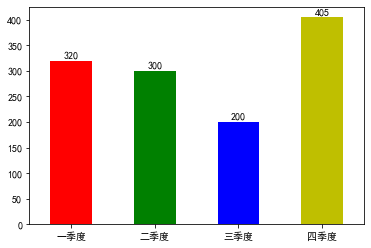

In [43]:
# 绘制柱状图
ser1.plot(kind = 'bar', color = ['r', 'g', 'b', 'y'])
# x轴的坐标旋转到0度（中文水平显示）
plt.xticks(rotation = 0)
# 在柱状图的柱子上绘制数字
for i in range(4):
    plt.text(i,ser1[i]+5,ser1[i],ha = 'center')    # text()前两个参数(x,y)表示位置
# 显示图像
plt.show()

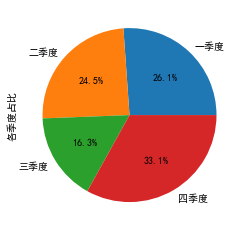

In [44]:
# 绘制饼图
ser1.plot(kind = 'pie', autopct='%.1f%%')    # autopct参数可以配置在饼图上显示每块饼的占比
# 设置y轴的标签（显示在饼图左侧的文字）
plt.ylabel('各季度占比')
plt.show()